In [ ]:
import os
import pandas as pd
import numpy as np
import nltk #NLTK (natural language toolkit)
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import string
import copy
import pyLDAvis #LDA visualization
import tqdm #used to show progress of iterative processes
import matplotlib.pyplot as plt
import pickle


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [ ]:
#create functions for data processing

#reads the text from the .txt files into python 

def text_reader(files): 
    text_UTF8 = [] 
    text = [] 
    for i in range(0, len(files)):
        text_UTF8.append(open(files[i], 'r', encoding='utf-8')) #opens and 'r' reads the text within in UTF-8 encoding
        text.append(text_UTF8[i].read()) #gives an array of textual data contained within .txt document
    return text

#text cleaner to process the data by removing stop words, words less than 3 letters, creates bigrams, etc. 

def text_cleaner(text): 
    stop_words_total = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"] #updating the stopwords list to include weird ones that don't give any meaning
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+') #simple regex to tokenize for all word characters
    for i in range(len(text)):
        text[i] = text[i].replace('-', '') #remove hyphens and ensure hyphenated words are not removed b/c they can have useful info
        text[i] = text[i].lower() # coerce all words to lowercase
        text[i] = tokenizer.tokenize(text[i]) #splits string by word
    bigrams = gensim.models.Phrases(text, min_count=3, threshold=10) #at least 3 instances of the bigram have to appear for it to be included. Higher threshold means less phrases
    bigram_model = gensim.models.phrases.Phraser(bigrams)
    text = [[token for token in txt if not token.isnumeric()] for txt in text] #remove numbers
    #text = [[token for token in txt if len(token) > 3] for txt in text] #removes all words less than 3 letters
    text = [[token for token in txt if not token in stop_words_total] for txt in text]
    text = [bigram_model[doc] for doc in text]
    return text

#lemmatizes the word into their "base" form. ie, passengers -> passenger

def text_lemmatizer(text, pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV']): #set default to nouns, adjectives, verbs, adverbs. May include PROPN for proper nouns? not sure
    import spacy
    import en_core_web_sm #module to lemmatize words
    nlp = en_core_web_sm.load()
    text_out = []
    for sent in text:
        doc = nlp(" ".join(sent))
        text_out.append([token.lemma_ for token in doc if token.pos_ in pos_tags])
    return text_out
  
#create dictionary out of the cleaned text

def create_dictionary(cleaned_text):
    dictionary = corpora.Dictionary(cleaned_text)
    dictionary.filter_extremes(no_below = 2, no_above = 0.66) #make sure terms that appear less than 3 times are omitted, and anything that appears in 2/3 of the documents
    return dictionary


import gensim.models

#create function that will find the optimal parameters 
def lda_parameter_tuning(corpus, dictionary, k, a, e, text): #k for number of topics, a for alpha, b for eta
    """"k: number of topics, e = eta, a = alpha, text = lemmatized, cleaned text"""
    lda_model = gensim.models.LdaMulticore(
        corpus = corpus,
        id2word = dictionary,
        num_topics = k,
        alpha= a, #Dirichlet prior tuning parameter
        eta = e,
        random_state = 206, #seed for reproducing results, number of bones in the body? idk
        workers = None, # how many cores to use? If none automatically set to os.cpu_count-1 (11 cores on this computer)
        passes = 50) #how many times will the model go through the corpus for training

    coherence_score = gensim.models.CoherenceModel(model=lda_model, 
                                               texts = text,
                                               dictionary = dictionary, 
                                               coherence = "c_v")
    return coherence_score.get_coherence()


def parameter_optimization(topics, alpha, eta, text, corpus, dictionary):
    """
    All variables are mandatory.  

    Arguments:

    Topics is an array from 0 to k, of how many topics are included.
    Alpha is an array of all the alpha values to be tested.
    Eta is an array of all eta values
    Text is the cleaned, lemmatized full text of the data set
    Corpus is the corpus from the cleaned text. Dictionary is dictionary from the cleaned text
    """
    import tqdm
    from gensim.models import CoherenceModel
    model_results = {'k Topics': [],
                 'Alpha': [],
                 'eta': [],
                 'Coherence Score': []} 
    if 1==1:
        progress = tqdm.tqdm(total=(len(eta)*len(alpha)*len(topics))) #progress bar to help show how many iterations are completed/are left
        for k in topics:
            for a in alpha:
                for e in eta:
                    lda_model = gensim.models.LdaMulticore(
                        corpus = corpus,
                        id2word = dictionary,
                        num_topics = k, #set number of topics
                        alpha = a, #alpha values as dirichlet priors
                        eta = e, #eta values as dirichlet priors
                        random_state = 206, #setting seed for replicability
                        workers = None, #workers is how many cores to use. When set to none, it uses workers=cpu_count()-1 (11 on this computer)
                        iterations = 50, #default for gensim, keep it like that
                        passes = 10) #passes will show how many times the model goes through the corpus. Multiple times may yield better results?
                    coherence = gensim.models.CoherenceModel(model = lda_model,
                                                                 texts = text,
                                                                 corpus = corpus,
                                                                 dictionary = dictionary, 
                                                                 window_size = 50, #window size normally default at 110, however text recommends sliding window size of at least 50 and median text length is 76.5
                                                                 coherence = 'c_v')
                    model_results['k Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['eta'].append(e)
                    model_results['Coherence Score'].append(coherence.get_coherence())
                    progress.update(1)
        coherence_results = pd.DataFrame(model_results)
        progress.close()
        return coherence_results

def doc_to_topic(topics_document, num_topics): #create a matrix for results
    matrix = pd.DataFrame(columns = range(num_topics))
    for topic_weights in topics_document:
        matrix.loc[0, topic_weights[0]] = topic_weights[1]
    return matrix
    



In [ ]:
#INFORMS dataset (49 documents)

os.chdir('C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\.txt Files')#changing directory to where INFORMS .txt files are
files_INFORMS = os.listdir() #lists the files in the directory


#run made functions to apply to the data

text_INFORMS = text_reader(files = files_INFORMS)
text_cleaned_INFORMS = text_cleaner(text =text_INFORMS)
text_cleaned_INFORMS = text_lemmatizer(text = text_cleaned_INFORMS)
dictionary_INFORMS = create_dictionary(text_cleaned_INFORMS)

#create corpus

corpus_INFORMS = [dictionary_INFORMS.doc2bow(txt) for txt in text_cleaned_INFORMS] #converts the dictionary into a bag of words (bow) using a sparse format to save memory
temp = dictionary_INFORMS[0] #not really sure what this does, but it prevents an error message from appearing
id2word_INFORMS = dictionary_INFORMS.id2token

# find optimal k, eta, and alpha

alpha = [0.01, 0.25, 0.50, 0.75, 0.99]
eta = [0.01, 0.25, 0.50, 0.75, 0.99]

INFORMS_results_fixedK = parameter_optimization(topics = range(18,19), alpha = alpha, eta = eta, #range of k to be changed depending on how many iterations over K is desired
                       text = text_cleaned_INFORMS, corpus = corpus_INFORMS,
                       dictionary = dictionary_INFORMS)






In [ ]:
# INFORMS

# Plotting

INFORMS_results.plot(x = 'k Topics', y = 'Coherence Score', kind = 'scatter')

# create optimal LDA model based off the parameters from the coherence scoring

LDA_model_INFORMS = LdaModel(
    corpus = corpus_INFORMS,
    id2word = id2word_INFORMS,
    random_state= 206, #set seed for reproducability
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 0.50, #using results from optimization function
    eta = 0.01,
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 22, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

LDA_model_INFORMS_fixedK = LdaModel(
    corpus = corpus_INFORMS,
    id2word = id2word_INFORMS,
    random_state= 206, #set seed for reproducability
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 'auto', #using auto for fixed K 
    eta = 'auto',
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 18, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

for t in range(0,LDA_model_INFORMS_fixedK.num_topics):
    plt.figure()
    plt.imshow(WordCloud(width = 800, height = 400).fit_words(dict(LDA_model_INFORMS.show_topic(t, 20))))
    plt.axis("off")
    plt.title("TSL2018 Topic " + str(t))
    plt.show



0.015270501
0.06577378


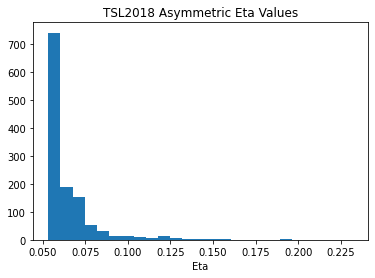

In [180]:
eta_INFORMS = LDA_model_INFORMS_fixedK.eta
alpha_INFORMS = LDA_model_INFORMS_fixedK.alpha
plt.hist(eta_INFORMS, bins = 25)
plt.title('TSL2018 Asymmetric Eta Values')
plt.xlabel('Eta')
print(np.average(alpha_INFORMS))
print(np.average(eta_INFORMS))

gensim.models.CoherenceModel(model=LDA_model_INFORMS_fixedK, 
                             texts = text_cleaned_INFORMS,
                             dictionary = dictionary_INFORMS, 
                             coherence = "c_v",
                             window_size = 50).get_coherence()


In [ ]:
INFORMS_coherence_max = INFORMS_results.groupby(['k Topics'], as_index = False).max()
INFORMS_plot = INFORMS_coherence_max.plot(x = 'k Topics', 
                           y = 'Coherence Score', 
                           kind = 'line',
                           title = "INFORMS",
                           legend = False)
INFORMS_plot.set_ylabel("Coherence Score")


In [ ]:
# ICSP Dataset (NTNU data set, 260 documents)

os.chdir('C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\NTNU')

files_ICSP = os.listdir()

#data pre-processing

text_ICSP = text_reader(files = files_ICSP)
text_cleaned_ICSP = text_cleaner(text =text_ICSP)
text_cleaned_ICSP = text_lemmatizer(text = text_cleaned_ICSP)
dictionary_ICSP = create_dictionary(text_cleaned_ICSP)

#corpus 

corpus_ICSP = [dictionary_ICSP.doc2bow(txt) for txt in text_cleaned_ICSP] #converts the dictionary into a bag of words (bow) using a sparse format to save memory
temp = dictionary_ICSP[0] #not really sure what this does, but it prevents an error message from appearing
id2word_ICSP = dictionary_ICSP.id2token

ICSP_results_fixedK = parameter_optimization(topics = range(72,73), alpha = alpha, eta = eta, #range of k to be changed depending on how many iterations over K is desired
                       text = text_cleaned_ICSP, corpus = corpus_ICSP,
                       dictionary = dictionary_ICSP)


In [ ]:
ICSP_length = []
for i in range(0,len(text_cleaned_ICSP)):
    ICSP_length.append(len(text_cleaned_ICSP[i]))

print(np.min(ICSP_length))
print(np.max(ICSP_length))
print(np.mean(ICSP_length))
print(np.median(ICSP_length))

In [ ]:
ICSP_results.plot(x = 'k Topics', y = 'Coherence Score', kind = 'scatter')


In [ ]:
# plotting

ICSP_results.plot(x = 'k Topics', y = 'Coherence Score', kind = 'scatter')

#make lda model

LDA_model_ICSP = LdaModel(
    corpus = corpus_ICSP,
    id2word = id2word_ICSP,
    random_state= 206, #set seed for reproducability
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 0.25, #using results from optimization function
    eta = 0.99,
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 70, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

LDA_model_ICSP_fixedK = LdaModel(
    corpus = corpus_ICSP,
    id2word = id2word_ICSP,
    random_state= 206, #set seed for reproducability
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 'auto', #using results from optimization function
    eta = 'auto',
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 72, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

#visualize


import matplotlib.pyplot as plt
for t in range(0,LDA_model_ICSP.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(LDA_model_ICSP.show_topic(t, 10))))
    plt.axis("off")
    plt.title("ICSP2019 Topic " + str(t))
    plt.show

0.2369956
0.013803676


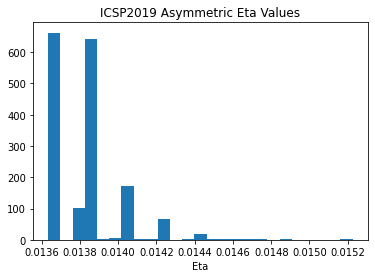

In [179]:
eta_ICSP = LDA_model_ICSP_fixedK.eta
alpha_ICSP = LDA_model_ICSP_fixedK.alpha
plt.hist(eta_ICSP, bins = 25)
plt.title('ICSP2019 Asymmetric Eta Values')
plt.xlabel('Eta')
print(np.average(alpha_ICSP))
print(np.average(eta_ICSP))



gensim.models.CoherenceModel(model=LDA_model_ICSP_fixedK, 
                             texts = text_cleaned_ICSP,
                             dictionary = dictionary_ICSP, 
                             coherence = "c_v",
                             window_size = 50).get_coherence()


In [ ]:
#LOGMS Data set (64 documents)

os.chdir('C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\LOGMS Full')

files_LOGMS = os.listdir()

text_LOGMS = text_reader(files_LOGMS)
text_cleaned_LOGMS = text_cleaner(text_LOGMS)
text_cleaned_LOGMS = text_lemmatizer(text = text_cleaned_LOGMS, pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN'])
dictionary_LOGMS = create_dictionary(text_cleaned_LOGMS)

#create corpus

corpus_LOGMS = [dictionary_LOGMS.doc2bow(txt) for txt in text_cleaned_LOGMS] #converts the dictionary into a bag of words (bow) using a sparse format to save memory
temp = dictionary_LOGMS[0] #not really sure what this does, but it prevents an error message from appearing
id2word_LOGMS = dictionary_LOGMS.id2token


alpha = [0.01, 0.25, 0.50, 0.75, 0.99]
eta = [0.01, 0.25, 0.50, 0.75, 0.99]

LOGMS_results = parameter_optimization(topics = range(20,60), alpha = alpha, eta = eta, #range of k to be changed depending on how many iterations over K is desired
                       text = text_cleaned_LOGMS, corpus = corpus_LOGMS,
                       dictionary = dictionary_LOGMS)


In [ ]:
LOGMS_results.plot(x = 'k Topics', y = 'Coherence Score', kind = 'scatter')

#make lda model

LDA_model_LOGMS = LdaModel(
    corpus = corpus_LOGMS,
    id2word = id2word_LOGMS,
    random_state= 206, #set seed for reproducability    
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 0.25, #using results from optimization function
    eta = 0.99,
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 49, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

LDA_model_LOGMS_fixedK = LdaModel(
    corpus = corpus_LOGMS,
    id2word = id2word_LOGMS,
    random_state= 206, #set seed for reproducability    
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 'auto', #setting to auto
    eta = 'auto',
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 24, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

#visualize


import matplotlib.pyplot as plt
for t in range(0,LDA_model_LOGMS_fixedK.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(LDA_model_LOGMS_fixedK.show_topic(t, 20))))
    plt.axis("off")
    plt.title("LOGMS2017 Topic " + str(t))
    plt.show

In [ ]:
eta_LOGMS= LDA_model_LOGMS_fixedK.eta
alpha_LOGMS = LDA_model_LOGMS_fixedK.alpha
plt.hist(eta_LOGMS, bins = 25)
plt.title('LOGMS2017 Asymmetric Eta Values')
plt.xlabel('Eta')
print(np.average(alpha_LOGMS))
print(np.average(eta_LOGMS))



gensim.models.CoherenceModel(model=LDA_model_LOGMS_fixedK, 
                             texts = text_cleaned_LOGMS,
                             dictionary = dictionary_LOGMS, 
                             coherence = "c_v",
                             window_size = 50).get_coherence()

In [ ]:
# Coherence Visualization

#INFORMS
INFORMS_coherence_max = INFORMS_results.groupby(['k Topics'], as_index = False).max()
INFORMS_plot = INFORMS_coherence_max.plot(x = 'k Topics', 
                                         y = 'Coherence Score', 
                                         kind = 'line',
                                         title = "TSL2018",
                                         legend = False)
INFORMS_plot.set_ylabel("Coherence Score")

#ICSP
ICSP_coherence_max = ICSP_results.groupby(['k Topics'], as_index = False).max()
ICSP_plot = ICSP_coherence_max.plot(x = 'k Topics', 
                                         y = 'Coherence Score', 
                                         kind = 'line',
                                         title = "ICSP2019",
                                         legend = False)
ICSP_plot.set_ylabel("Coherence Score")

#LOGMS
LOGMS_coherence_max = LOGMS_results.groupby(['k Topics'], as_index = False).max()
LOGMS_plot = LOGMS_coherence_max.plot(x = 'k Topics', 
                                         y = 'Coherence Score', 
                                         kind = 'line',
                                         title = "LOGMS2017",
                                         legend = False)
LOGMS_plot.set_ylabel("Coherence Score")


In [ ]:
def token_counter(text):
    text_sum = []
    for i in range(0,len(text)):
        text_sum.append(len(text[i]))
    return text_sum

document_data = {'No. Docs': [len(text_INFORMS), len(text_ICSP), len(text_LOGMS)],
                 'Total File Size': ['217 KB', '352 KB', '128 KB'],
                 'Total Tokens (Pre-Cleaning)': [sum(token_counter(text_INFORMS)),sum(token_counter(text_ICSP)), sum(token_counter(text_LOGMS))],
                 'Avg. Tokens (Pre-Cleaning)':[np.mean(token_counter(text_INFORMS)), np.mean(token_counter(text_ICSP)), np.mean(token_counter(text_LOGMS))],
                 'Tokens Std. Dev (Pre-Cleaning)':[np.std(token_counter(text_INFORMS)), np.std(token_counter(text_ICSP)), np.std(token_counter(text_LOGMS))],
                 'Tokens (Post-Cleaning)': [sum(token_counter(text_cleaned_INFORMS)),sum(token_counter(text_cleaned_ICSP)), sum(token_counter(text_cleaned_LOGMS))],
                 'Total Avg. Tokens (Post-Cleaning':[np.mean(token_counter(text_cleaned_INFORMS)), np.mean(token_counter(text_cleaned_ICSP)), np.mean(token_counter(text_cleaned_LOGMS))],
                 'Tokens Std. Dev (Post-Cleaning):' :[np.std(token_counter(text_cleaned_INFORMS)), np.std(token_counter(text_cleaned_ICSP)), np.std(token_counter(text_cleaned_LOGMS))]}

df = pd.DataFrame(data = document_data, index = ['INFORMS', 'ICSP', 'LOGMS'])
df = df.T





In [ ]:
ICSP_max = ICSP_results.iloc[[231]]
LOGMS_max = LOGMS_results.loc[[222]]
INFORMS_max = INFORMS_results.loc[[328]]

print(ICSP_max)
print(LOGMS_max)
print(INFORMS_max)

In [ ]:
# Document - topic placement

ICSP_topics = [LDA_model_ICSP[corpus_ICSP[i]] for i in range(len(text_cleaned_ICSP))]
topic_matrix_ICSP = pd.concat(([doc_to_topic(topics_document, num_topics=70) for topics_document in ICSP_topics])).reset_index(drop=True).fillna(0)

ICSP_topics_fixedK = [LDA_model_ICSP_fixedK[corpus_ICSP[i]] for i in range(len(text_cleaned_ICSP))]
topic_matrix_ICSP_fixedK = pd.concat(([doc_to_topic(topics_document, num_topics=72) for topics_document in ICSP_topics_fixedK])).reset_index(drop=True).fillna(0)

topic_matrix_ICSP.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\ICSP_Topics.csv', index = True)
topic_matrix_ICSP_fixedK.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\ICSP_Topics_fixedK.csv', index = True)

INFORMS_topics = [LDA_model_INFORMS[corpus_INFORMS[j]] for j in range(len(text_cleaned_INFORMS))]
topic_matrix_INFORMS = pd.concat(([doc_to_topic(topics_document, num_topics=22) for topics_document in INFORMS_topics])).reset_index(drop=True).fillna(0)

INFORMS_topics_fixedK = [LDA_model_INFORMS_fixedK[corpus_INFORMS[j]] for j in range(len(text_cleaned_INFORMS))]
topic_matrix_INFORMS_fixedK = pd.concat(([doc_to_topic(topics_document, num_topics=18) for topics_document in INFORMS_topics_fixedK])).reset_index(drop=True).fillna(0)

topic_matrix_INFORMS.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\INFORMS_Topics.csv', index = True)
topic_matrix_INFORMS_fixedK.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\INFORMS_Topics_fixedK.csv', index = True)


LOGMS_topics = [LDA_model_LOGMS[corpus_LOGMS[j]] for j in range(len(text_cleaned_LOGMS))]
topic_matrix_LOGMS = pd.concat(([doc_to_topic(topics_document, num_topics=49) for topics_document in LOGMS_topics])).reset_index(drop=True).fillna(0)

LOGMS_topics_fixedK = [LDA_model_LOGMS_fixedK[corpus_LOGMS[j]] for j in range(len(text_cleaned_LOGMS))]
topic_matrix_LOGMS_fixedK = pd.concat(([doc_to_topic(topics_document, num_topics=24) for topics_document in LOGMS_topics_fixedK])).reset_index(drop=True).fillna(0)


topic_matrix_LOGMS.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\LOGMS_Topics.csv', index = True)
topic_matrix_LOGMS_fixedK.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\LOGMS_Topics_fixedK.csv', index = True)



In [ ]:
LOGMS_results.to_csv(r'C:\\Users\\krist\\OneDrive\\Thesis_Desktop\\Data\\LOGMS_results.csv', index = True)

In [ ]:
# Visualize document placement

INFORMS_topic_plot = topic_matrix_INFORMS.idxmax(axis = 1).value_counts().plot(
    title = "TSL2018",
    kind = "bar")

INFORMS_topic_plot.set_xlabel("Topic")
INFORMS_topic_plot.set_ylabel("Number of Documents")



In [ ]:
ICSP_topic_plot = topic_matrix_ICSP_fixedK.idxmax(axis = 1).value_counts().plot(
    title = "ICSP2019 (K = 72)",
    kind = "bar")

ICSP_topic_plot.set_xlabel("Topic")
ICSP_topic_plot.set_ylabel("Number of Documents")

In [ ]:
topic_matrix_INFORMS.idxmax(axis = 1).value_counts()

In [ ]:
LOGMS_topic_plot = topic_matrix_LOGMS_fixedK.idxmax(axis = 1).value_counts().plot(
    title = "LOGMS2017 (K = 24)",
    kind = "bar")

LOGMS_topic_plot.set_xlabel("Topic")
LOGMS_topic_plot.set_ylabel("Number of Documents")

In [ ]:
import csv
ICSP_df = LDA_model_ICSP.show_topics(70) #shows topics and words contained within for ICSP
LOGMS_df = LDA_model_LOGMS.show_topics(49)
INFORMS_df = LDA_model_INFORMS.show_topics(22)

ICSP_df_fixedK = LDA_model_ICSP_fixedK.show_topics(72) #same as above with the other version (fixed K)
INFORMS_df_fixedK = LDA_model_INFORMS_fixedK.show_topics(18)
LOGMS_df_fixedK = LDA_model_LOGMS_fixedK.show_topics(24) 

with open("LOGMS_df_fixedK.csv", "w", newline="", encoding = 'utf-8') as f: #save results as csv
    writer = csv.writer(f)
    writer.writerows(LOGMS_df_fixedK)


In [ ]:
LOGMS_df_fixedK = LDA_model_LOGMS_fixedK.show_topics(24)
print(LOGMS_df_fixedK)

In [178]:
import time

start_time = time.time() #timing how long to run code

LDA_model_ICSP_fixedK = LdaModel(
    corpus = corpus_ICSP,
    id2word = id2word_ICSP,
    random_state= 206, #set seed for reproducability
    chunksize = 50, #how many documents the LDA will be evaluated at once 
    alpha = 'auto', #using results from optimization function
    eta = 'auto',
    iterations = 200, #number of iterations the model will go through, training it more than multicore model 'cause not as intensive
    num_topics = 72, #number of topics
    passes = 50, #how often the model is trained on the entire corpus
    eval_every = None #Log perplexity is estimated every that many updates. Setting this to one slows down training by ~2x
)

print(time.time() - start_time)


10.10092568397522
